In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [3]:
df = pd.read_csv('DOS attacks-Slowloris.csv')

In [4]:
df.head(10)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,17,115999879,16,0,512,0.0,32,32,32.000000,...,8,1.100000e+07,0.000000e+00,11000000.0,11000000.0,9.182527e+06,5.757013e+06,26000000.0,5007995.0,Benign
1,80,17,119959955,14,0,448,0.0,32,32,32.000000,...,8,2.990056e+06,1.428372e+06,4000068.0,1980045.0,1.110000e+07,6.225628e+06,26000000.0,5020050.0,Benign
2,10610,6,148625,2,1,0,0.0,0,0,0.000000,...,20,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign
3,22,6,1273538,2,2,0,0.0,0,0,0.000000,...,20,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign
4,80,6,117252095,18,16,879,1412.0,434,0,48.833333,...,20,2.136087e+05,3.934805e+05,1399997.0,94932.0,1.000389e+07,3.400814e+04,10014176.0,9901351.0,Benign
5,80,6,811,3,4,148,243.0,148,0,49.333333,...,20,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign
6,80,6,5900755,4,4,97,231.0,97,0,24.250000,...,20,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign
7,50156,6,6158,3,1,108,0.0,77,0,36.000000,...,20,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign
8,443,6,110231883,17,16,1239,840.0,660,0,72.882353,...,20,2.314873e+04,4.091480e+04,146511.0,10686.0,9.996951e+06,2.521672e+04,10004705.0,9920921.0,Benign
9,53,17,1722,1,1,34,79.0,34,34,34.000000,...,8,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Benign


Label
Benign                   25764
DoS attacks-Slowloris    10990
Name: count, dtype: int64


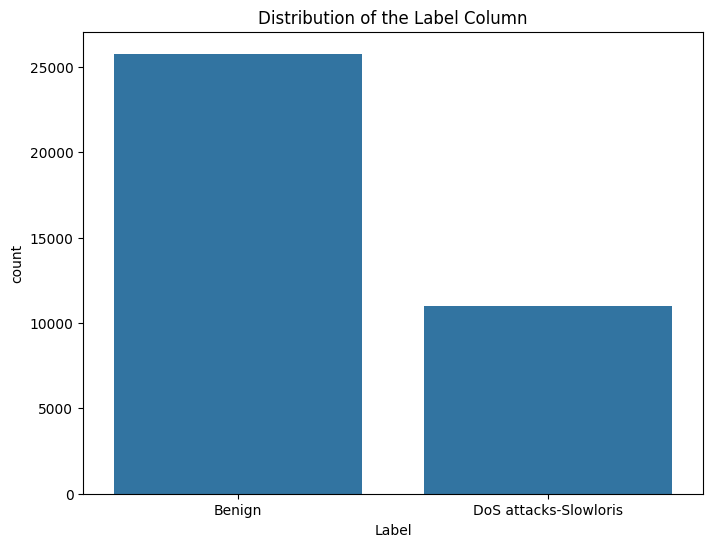

In [5]:
print(df['Label'].value_counts())

# Visualize the count of each class in the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Distribution of the Label Column')
plt.show()

# correlation matrix 

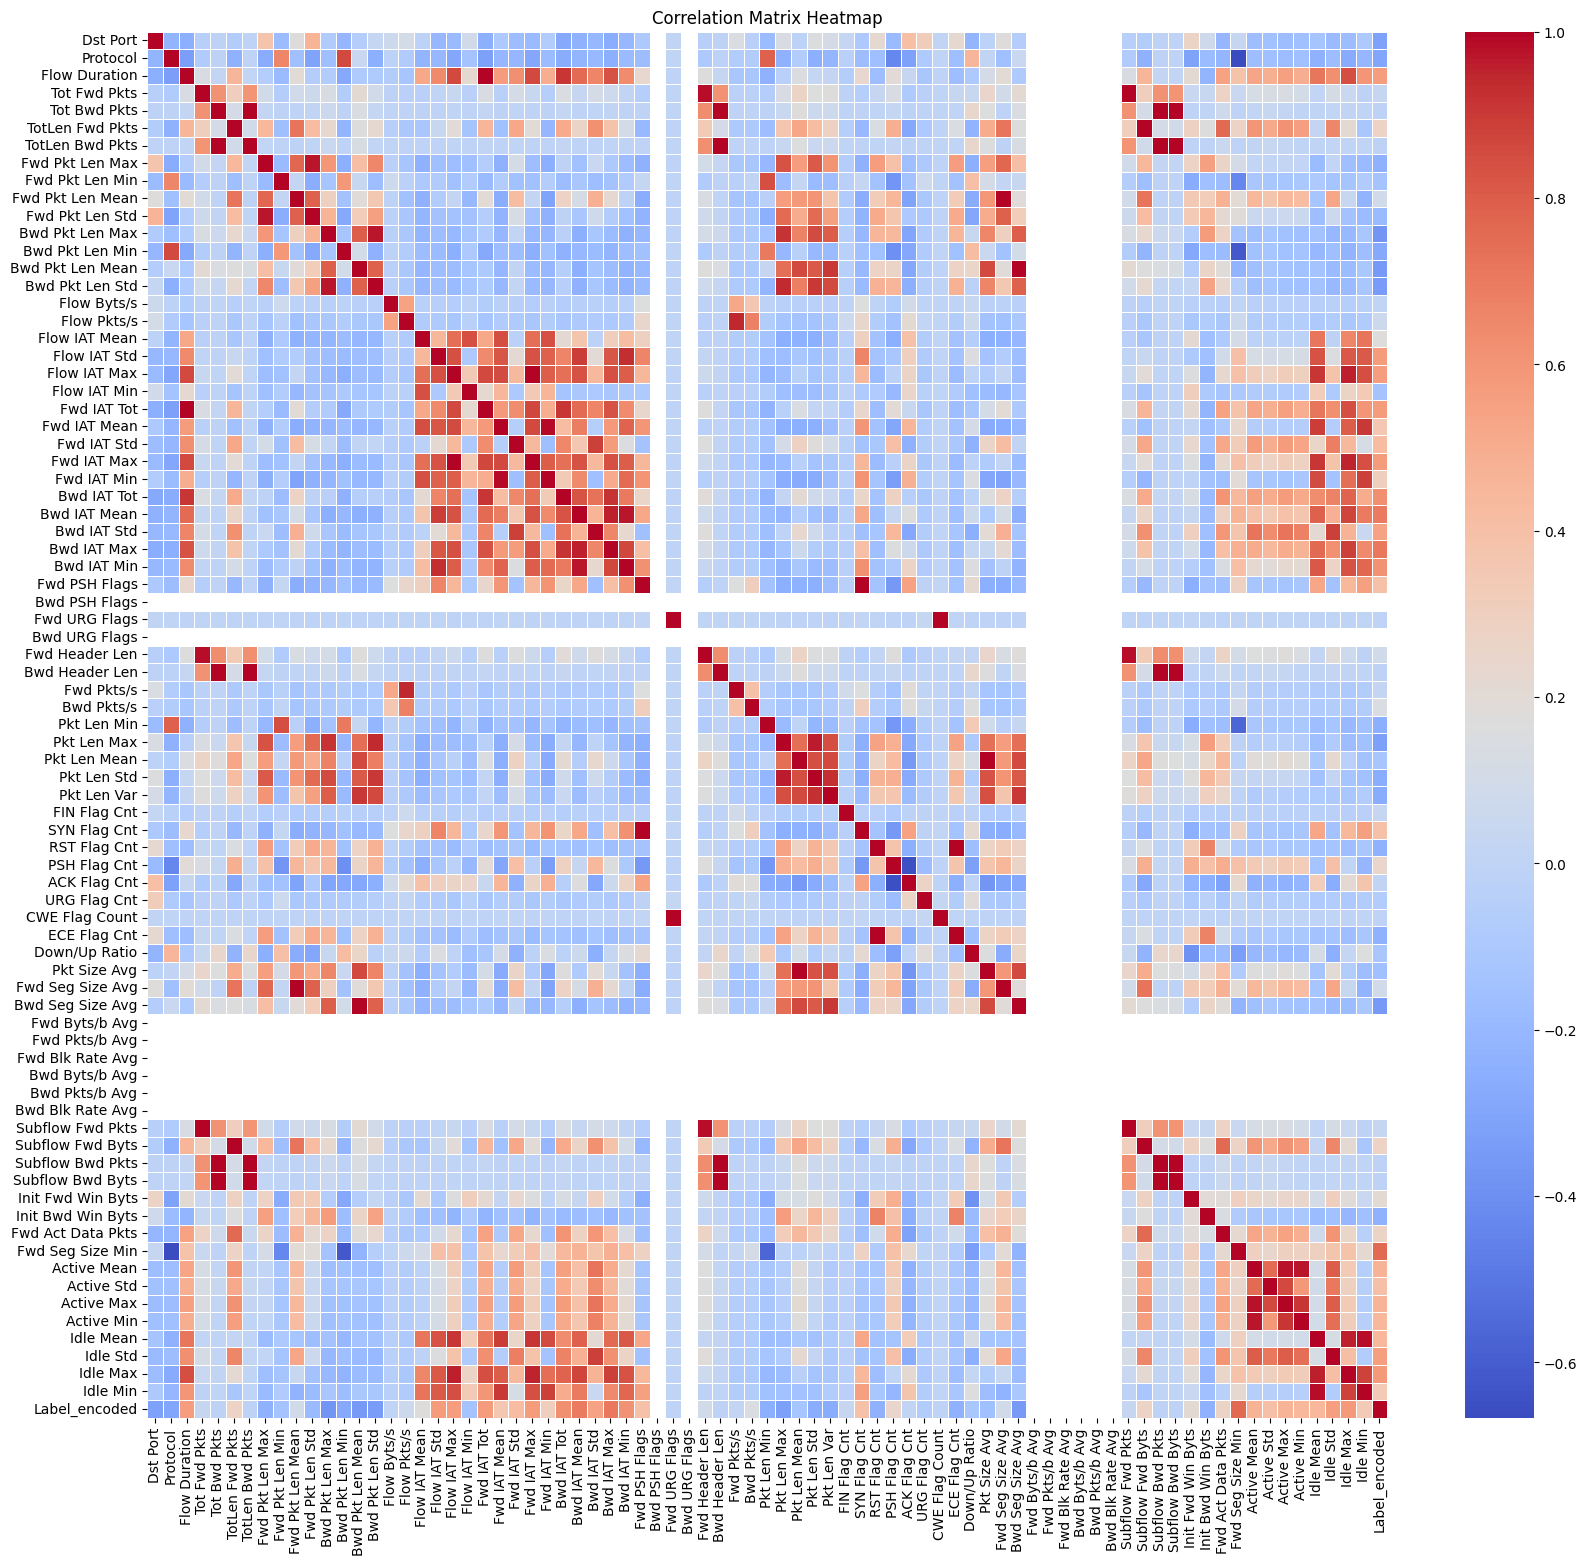

In [6]:
from sklearn.preprocessing import LabelEncoder
# Compute the correlation matrix
df1 = df.copy(deep=True)

# Encode the 'Label' column in df1
label_encoder = LabelEncoder()
df1['Label_encoded'] = label_encoder.fit_transform(df1['Label'])

# Drop non-numeric columns
df1_numeric = df1.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df1_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show() 


In [7]:
# Display the features most correlated with the encoded 'Label' column
correlation_with_label = correlation_matrix['Label_encoded'].sort_values(ascending=False)
print("Top 10 features most positively correlated with the Label:")
print(correlation_with_label.head(10))

Top 10 features most positively correlated with the Label:
Label_encoded       1.000000
Fwd Seg Size Min    0.764984
Bwd IAT Max         0.710218
Bwd IAT Mean        0.697902
Bwd IAT Tot         0.622774
Bwd IAT Min         0.611465
Idle Max            0.577291
Flow IAT Std        0.571583
Fwd IAT Max         0.571254
Fwd IAT Tot         0.570859
Name: Label_encoded, dtype: float64


In [ ]:
# random forest 
# DoS attacks-Slowloris.csv	Fwd Seg Size Min	0.111860996
# DoS attacks-Slowloris.csv	Bwd IAT Min	0.07969853
# DoS attacks-Slowloris.csv	Bwd IAT Max	0.059822972
# DoS attacks-Slowloris.csv	Flow IAT Std	0.059114945
# DoS attacks-Slowloris.csv	Bwd IAT Mean	0.053088496
# DoS attacks-Slowloris.csv	Dst Port	0.044397244
# DoS attacks-Slowloris.csv	Flow IAT Mean	0.042903824
# DoS attacks-Slowloris.csv	Fwd Pkts/s	0.039918105
# DoS attacks-Slowloris.csv	Flow Pkts/s	0.035481911
# DoS attacks-Slowloris.csv	Fwd IAT Tot	0.029864475
# DoS attacks-Slowloris.csv	Fwd IAT Mean	0.024415737
# DoS attacks-Slowloris.csv	Bwd Pkts/s	0.024198968
# DoS attacks-Slowloris.csv	Fwd Header Len	0.022404525
# DoS attacks-Slowloris.csv	Flow IAT Min	0.021325373
# DoS attacks-Slowloris.csv	Bwd Pkt Len Mean	0.02043337
# DoS attacks-Slowloris.csv	Flow Duration	0.020125687
# DoS attacks-Slowloris.csv	Init Fwd Win Byts	0.015858791
# DoS attacks-Slowloris.csv	Bwd Pkt Len Max	0.014264435
# DoS attacks-Slowloris.csv	Bwd Seg Size Avg	0.014009105
# DoS attacks-Slowloris.csv	TotLen Bwd Pkts	0.013907792
# DoS attacks-Slowloris.csv	Bwd IAT Tot	0.013431123
# DoS attacks-Slowloris.csv	Bwd Header Len	0.013175361
# DoS attacks-Slowloris.csv	Pkt Len Max	0.012549535
# DoS attacks-Slowloris.csv	Fwd Seg Size Avg	0.012392122
# autoencoder-
# DoS attacks-Slowloris.csv	Dst Port	15.73389244
# DoS attacks-Slowloris.csv	Fwd Seg Size Min	15.15029526
# DoS attacks-Slowloris.csv	ACK Flag Cnt	13.67392159
# DoS attacks-Slowloris.csv	Bwd Pkts/s	13.29115677
# DoS attacks-Slowloris.csv	Init Bwd Win Byts	12.97376728
# DoS attacks-Slowloris.csv	Down/Up Ratio	12.9403162
# DoS attacks-Slowloris.csv	Fwd URG Flags	12.90920639
# DoS attacks-Slowloris.csv	CWE Flag Count	12.54445744
# DoS attacks-Slowloris.csv	Bwd IAT Min	12.37475681
# DoS attacks-Slowloris.csv	Init Fwd Win Byts	12.3244381
# DoS attacks-Slowloris.csv	Fwd Pkts/s	11.86289406
# DoS attacks-Slowloris.csv	PSH Flag Cnt	11.6649332
# DoS attacks-Slowloris.csv	Fwd IAT Min	11.00898266
# DoS attacks-Slowloris.csv	Flow Pkts/s	10.80811882
# DoS attacks-Slowloris.csv	Bwd Pkt Len Min	10.49705696
# DoS attacks-Slowloris.csv	Protocol	10.32821655
# DoS attacks-Slowloris.csv	SYN Flag Cnt	10.30092049
# DoS attacks-Slowloris.csv	Flow IAT Min	9.977538109
# DoS attacks-Slowloris.csv	Fwd IAT Std	9.844800949
# DoS attacks-Slowloris.csv	Bwd IAT Mean	9.359185219
# DoS attacks-Slowloris.csv	Pkt Len Min	9.290139198
# DoS attacks-Slowloris.csv	Bwd IAT Tot	9.250470161
# DoS attacks-Slowloris.csv	FIN Flag Cnt	9.146891594
# DoS attacks-Slowloris.csv	URG Flag Cnt	9.136797905
# DoS attacks-Slowloris.csv	Bwd IAT Std	8.992983818
# lda -
# DoS attacks-Slowloris.csv	Bwd Header Len	-117.1505169
# DoS attacks-Slowloris.csv	Idle Max	-59.78537415
# DoS attacks-Slowloris.csv	Bwd IAT Mean	55.89651167
# DoS attacks-Slowloris.csv	Fwd IAT Tot	52.42928049
# DoS attacks-Slowloris.csv	Fwd IAT Min	48.06997594
# DoS attacks-Slowloris.csv	Fwd Seg Size Min	48.04307144
# DoS attacks-Slowloris.csv	Fwd IAT Mean	-44.76588573
# DoS attacks-Slowloris.csv	PSH Flag Cnt	-40.89935535
# DoS attacks-Slowloris.csv	Bwd IAT Min	-40.76434354
# DoS attacks-Slowloris.csv	ACK Flag Cnt	-39.41096642
# DoS attacks-Slowloris.csv	Pkt Len Std	35.71313011
# DoS attacks-Slowloris.csv	Flow Duration	-35.31815969
# DoS attacks-Slowloris.csv	Fwd IAT Max	-32.46183144
# DoS attacks-Slowloris.csv	TotLen Bwd Pkts	31.7493648
# DoS attacks-Slowloris.csv	Subflow Bwd Byts	31.7493648
# DoS attacks-Slowloris.csv	Idle Min	30.24707075
# DoS attacks-Slowloris.csv	Flow IAT Mean	28.60951549
# DoS attacks-Slowloris.csv	Pkt Len Max	-28.56814567
# DoS attacks-Slowloris.csv	Flow IAT Min	-27.02422583
# DoS attacks-Slowloris.csv	Subflow Bwd Pkts	26.66137855
# DoS attacks-Slowloris.csv	Tot Bwd Pkts	26.66137855
# DoS attacks-Slowloris.csv	Fwd Pkt Len Std	-26.36369202
# DoS attacks-Slowloris.csv	Flow IAT Max	21.63437654
# DoS attacks-Slowloris.csv	Bwd Pkt Len Max	17.65773269
# DoS attacks-Slowloris.csv	Bwd IAT Tot	-17.05460299


In [5]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.metrics import classification_report, confusion_matrix
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Input
# from tensorflow.keras.models import Model

# # Load and prepare data
# df = pd.read_csv('DoS attacks-Slowloris.csv')

# # Separate features and target
# X = df.drop('Label', axis=1)  # Assuming 'Label' is the target column
# y = df['Label']

# # Encode labels
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)

# # Scale features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# # 1. Random Forest Feature Extraction
# def random_forest_feature_importance(X_train, y_train, X_test):
#     rf = RandomForestClassifier(n_estimators=100, random_state=42)
#     rf.fit(X_train, y_train)
    
#     # Get feature importance scores
#     importances = rf.feature_importances_
#     feature_indices = np.argsort(importances)[::-1][:10]  # Top 10 features
    
#     return X_train[:, feature_indices], X_test[:, feature_indices], rf

# # 2. LDA Feature Extraction
# def lda_feature_extraction(X_train, y_train, X_test):
#     lda = LinearDiscriminantAnalysis()
#     X_train_lda = lda.fit_transform(X_train, y_train)
#     X_test_lda = lda.transform(X_test)
    
#     return X_train_lda, X_test_lda, lda

# # 3. Autoencoder Feature Extraction
# def autoencoder_feature_extraction(X_train, X_test):
#     input_dim = X_train.shape[1]
#     encoding_dim = 10
    
#     input_layer = Input(shape=(input_dim,))
#     encoded = Dense(encoding_dim, activation='relu')(input_layer)
#     decoded = Dense(input_dim, activation='sigmoid')(encoded)
    
#     autoencoder = Model(input_layer, decoded)
#     encoder = Model(input_layer, encoded)
    
#     autoencoder.compile(optimizer='adam', loss='mse')
#     autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, verbose=0)
    
#     X_train_encoded = encoder.predict(X_train)
#     X_test_encoded = encoder.predict(X_test)
    
#     return X_train_encoded, X_test_encoded, encoder

# # Apply feature extraction methods
# X_train_rf, X_test_rf, rf_model = random_forest_feature_importance(X_train, y_train, X_test)
# X_train_lda, X_test_lda, lda_model = lda_feature_extraction(X_train, y_train, X_test)
# X_train_ae, X_test_ae, encoder_model = autoencoder_feature_extraction(X_train, X_test)

# # Create ensemble model
# def create_ensemble_model():
#     rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
#     rf_clf.fit(X_train_rf, y_train)
#     return rf_clf

# ensemble_model = create_ensemble_model()

# # Function to predict single log
# def predict_log(log_data):
#     # Scale the input data
#     log_scaled = scaler.transform(log_data)
    
#     # Extract features using all methods
#     log_rf = log_scaled[:, rf_model.feature_importances_.argsort()[::-1][:10]]
#     log_lda = lda_model.transform(log_scaled)
#     log_ae = encoder_model.predict(log_scaled)
    
#     # Make prediction using ensemble model
#     prediction = ensemble_model.predict(log_rf)
    
#     return le.inverse_transform(prediction)[0]

# # Function to test random log from dataset
# def test_random_log():
#     # Select random row
#     random_idx = np.random.randint(0, len(df))
#     random_log = df.iloc[random_idx:random_idx+1].copy()
#     actual_label = random_log['Label'].values[0]
#     random_log_features = random_log.drop('Label', axis=1)
    
#     # Make prediction
#     predicted_label = predict_log(random_log_features)
    
#     print("Random Log Details:")
#     print(random_log)
#     print("\nActual Label:", actual_label)
#     print("Predicted Label:", predicted_label)
#     print("Attack Detected:", "Yes" if predicted_label == "DoS attacks-Slowloris" else "No")

# # Test the model with random log
# test_random_log()

# # Space for custom log testing
# """
# # To test your own log, use this format:
# custom_log = pd.DataFrame({
#     'feature1': [value1],
#     'feature2': [value2],
#     ...
# })
# result = predict_log(custom_log)
# print("Prediction for custom log:", result)
# """

# # Print model performance metrics
# y_pred = ensemble_model.predict(X_test_rf)
# print("\nModel Performance Metrics:")
# print(classification_report(y_test, y_pred))

919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Random Log Details:
      Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
4661     49659         6              2             3             0   

      TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
4661               31              0.0               31                0   

      Fwd Pkt Len Mean  ...  Fwd Seg Size Min  Active Mean  Active Std  \
4661         10.333333  ...                20          0.0         0.0   

      Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  
4661         0.0         0.0        0.0       0.0       0.0       0.0  Benign  

[1 rows x 79 columns]

Actual Label: Benign
Predicted Label: Benign
Attack Detected: No

Model Performance Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5175
           1       1.00      

In [6]:
test_random_log()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Random Log Details:
      Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
1139        53        17            252             1             1   

      TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
1139               39             55.0               39               39   

      Fwd Pkt Len Mean  ...  Fwd Seg Size Min  Active Mean  Active Std  \
1139              39.0  ...                 8          0.0         0.0   

      Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  
1139         0.0         0.0        0.0       0.0       0.0       0.0  Benign  

[1 rows x 79 columns]

Actual Label: Benign
Predicted Label: Benign
Attack Detected: No


In [8]:
from joblib import dump

# Save the ensemble model
dump(ensemble_model, 'DOS_ATTACK_slowloris_ensemble_model.joblib')

# Save the scaler
dump(scaler, 'DOS_ATTACK_slowloris_scaler.joblib')

# Save the label encoder
dump(le, 'DOS_ATTACK_slowloris_label_encoder.joblib')

['DOS_ATTACK_slowloris_label_encoder.joblib']